In [22]:
import seaborn as sns
import pandas as pd 
import numpy as np
from math import *
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
# Jupyter Notebook
try:
    #For Kaggle run
    AAPL_data=pd.read_csv('/kaggle/input/apple-aapl-stocks-financial-performance/AAPL.csv',index_col=None)
    AAPL_data_sliced=AAPL_data[AAPL_data.columns[2:]]
#AAPL_data_sliced
except:
    #For offline run
    AAPL_data=pd.read_csv('AAPL.csv',index_col=None) # Read the data
    AAPL_data_sliced=AAPL_data[AAPL_data.columns[2:]] 
"""# Slice the first two columns
Symbol and Date" to avoid errors when computing descriptive statistics 
especially for visualizations"""
AAPL_data_sliced

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,146.58,147.200,144.96,145.10,32818760,34.593441,34.739763,34.211115,34.244155,131275040,0.0,1.0
1,147.51,148.090,146.84,147.54,39752670,34.812924,34.949807,34.654802,34.820004,159010680,0.0,1.0
2,147.06,147.490,144.27,145.59,45142806,34.706723,34.808204,34.048272,34.359797,180571224,0.0,1.0
3,146.53,147.140,145.81,146.52,23275690,34.581641,34.725603,34.411718,34.579281,93102760,0.0,1.0
4,148.96,148.980,146.76,146.76,26787359,35.155130,35.159850,34.635922,34.635922,107149436,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,162.88,163.170,158.46,161.12,96046376,162.880000,163.170000,158.460000,161.120000,96046376,0.0,1.0
1256,156.80,162.340,156.72,162.25,94008394,156.800000,162.340000,156.720000,162.250000,94008394,0.0,1.0
1257,156.57,159.790,155.38,155.91,88063191,156.570000,159.790000,155.380000,155.910000,88063191,0.0,1.0
1258,163.64,164.515,158.93,159.25,130216792,163.640000,164.515000,158.930000,159.250000,130216792,0.0,1.0



<h1>2.1 Random Sampling and Sample Bias </h1>
<h2> Bias</h2>

<h3>Statistical bias</h3> 
refers to measurement or sampling errors that are systematic
        -or Systematic error
<h3>Selection bias</h3>

Bias resulting from the way in which observations are selected -(see selection bias in the regression to the mean)

<h3>Sample bias</h3> 
Sample bias- A sample that misrepresents the population
<h2>Random Selection</h2>
In stratified sampling, the population is divided up into strata, and random samples
                are taken from each stratum.

(Stratum (pl., strata) -A homogeneous subgroup of a population with common characteristics)

Random sampling- Drawing elements into a sample at random.
<h3>Size Versus Quality</h3>

Size Versus Quality: When Does Size Matter?
                Small Data Improves Data Quality and Data Exploration through random sampling of big Data.

<h3>Sample Mean Versus Population Mean</h3>
Sample Mean Versus Population Mean
                Sample Mean (x') or X bar -from e.g., random sampling
                Population Mean μ


<h2> Selection Bias</h2>
        Regression to the Mean

        Regression to the mean, meaning to “go back,” is distinct from the statistical modeling method of linear regression, in which a linear relationship is estimated between predictor variables and an outcome variable.
<h2>2.3: Sampling Distribution of a Statistic</h2>

        Sampling distribution: The frequency distribution of a sample statistic over many samples or resamples
Sample statistic- A metric calculated for a sample of data drawn from a larger population

Data distribution- The frequency distribution of individual values in a data set


In [ ]:
"""Sampling Distribution of a statistic


# Example of using Histograms to represent the sampling distribution 
# for
#  samples sizes of 50,100,200
"""

sample_mean_50=pd.DataFrame({'Sample':[AAPL_data_sliced.sample(50).mean() for _ in range(200)],
'Type':'Mean of 50',})
sample_mean_100=pd.DataFrame({'Sample':[AAPL_data_sliced.sample(100).mean() for _ in range(200)],
'Type':'Mean of 100',})
sample_mean_200=pd.DataFrame({'Sample':[AAPL_data_sliced.sample(200).mean() for _ in range(200)],
'Type':'Mean of 200',})

sampling_compiled=pd.concat([sample_mean_50,sample_mean_100,sample_mean_200])
sample_mean_100
#sampling_compiled

In [ ]:
g=sns.FacetGrid(sampling_compiled,col='Type',col_wrap=1,height=2,aspect=2)
#g.map(plt.hist,'Sample',range=[0,600],bins=4)
g.map(plt.hist,'Type')
g.set_axis_labels('Close Prices','Count')
g.set_titles('{col_name}')
plt.show()


<h3>Central Limit Theorem </h3>


        Central limit theorem-The tendency of the sampling distribution to take on a normal shape as sample size rises.

CLT states: Means drawn from multiple samples will resemble the familiar bell-shaped normal curve

CLT allows normal-approximation formulas like the t-distribution to be used in calculating       sampling distributions for inference
<h3> Standard Error </h3>

The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).
Standard Error = Std deviation/sqrt(n) where n=sample size


In [18]:
# standard Error
standardDev_one=AAPL_data_sliced['close'].std()
print("The standard deviation is: {}".format(standardDev_one))
print("The standard Error is: {}".format(standardDev_one/sqrt(AAPL_data_sliced['close'].count())))

# To confirm this is true; we use the relationship S.E= stdev/sqrt(n)
# Using Numpy standard error = np.std(x,dof) dof= degrees  of freedom
standardError_Two=np.std(AAPL_data_sliced['close'],0)/sqrt(AAPL_data_sliced['close'].count())
print("The standard Error from numpy {}".format(standardError_Two))

"You noticed pandas.std() gives the standard deviation whereas numpy.std() gives standard Error"


The standard deviation is: 68.2904595872228
The standard Error is: 1.9238657492502387
The standard Error from numpy 1.923102158924764


<h2>2.4: The Bootstrap </h2>
        Resampling Versus Bootstrapping
Bootstrap sample- A sample taken with replacement from an observed data set.

Resampling-The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

        see scikit-learn method resample for more info
<h2>2.5: Confidence Intervals </h2>
        Confidence Intervals, the typical way to present estimates as an interval range
        The bootstrap is an effective way to construct confidence intervals
<h2>2.6: Normal Distribution </h2>
        Standard Normal and QQ-Plots

        Standardize-Subtract the mean and divide by the standard deviation.

        z-score-The result of standardizing an individual data point.

        Standard normal-A normal distribution with mean = 0 and standard deviation = 1.
        
        QQ-Plot-A plot to visualize how close a sample distribution is to a specified distribution,e.g., the normal distribution.
        


In [ ]:
# QQ Plot using the scipy.stats
fig, ax=plt.subplots(figsize=(3,3))
norm_sample=stats.norm.rvs(size=100) #sample of 100 values drawn from a standard normal distribution
stats.probplot(norm_sample,plot=ax)

<h2>2.7: Long-Tailed Distributions </h2>
        Long-Tailed Distributions
        
        Tail-The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

        Skew -Where one tail of a distribution is longer than the other
        


((array([-3.26363413, -3.00339444, -2.85848417, ...,  2.85848417,
          3.00339444,  3.26363413]),
  array([106.84, 107.12, 108.22, ..., 500.04, 503.43, 506.09])),
 (62.216054784542656, 191.97562698253967, 0.9093446418459065))

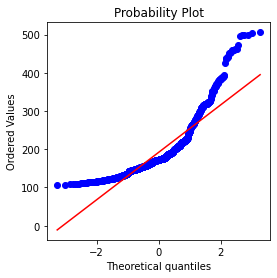

In [25]:
# Long tailed Data distribution Illustration using QQ Plot
fig,ax=plt.subplots(figsize=(4,4))
stats.probplot(AAPL_data_sliced['close'],plot=ax)

<h2>2.8: Student’s t-Distribution </h2>

t-Distribution; is actually a family of distributions resembling the normal distribution but with thicker tails.

n=Sample size.

Degrees of freedom= A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups.


<h2>Binomial Distribution </h2>
        Binomial Distribution
<h2>2.9: Chi-Square Distribution </h2>
        Chi-Square Distribution
<h2>2.10: F-Distribution </h2>
        F-Distribution
<h2>2.11: Poisson and Related Distributions </h2>
        <h3>Poisson Distributions </h3>
The frequency distribution of the number of events in sampled units of time or
space.
        <h3>Exponential Distribution </h3>
The frequency distribution of the time or distance from one event to the next
event.
<h3>Estimating the Failure Rate </h3>
<h3>Weibull Distribution </h3>

A generalized version of the exponential distribution in which the event rate is
allowed to shift over time